$\renewcommand{\ket}[1]{|#1\rangle}$

# Lecture 0.2


## Installation

In [10]:
# !pip install qiskit

# the output will be cleared after installation
from IPython.display import clear_output
clear_output()

## Save IBM account on your device

In [11]:
from qiskit import IBMQ

# IBMQ.save_account('sdj5sd2d52sd55sdsdf52sdfdfg55df') # enter you token here
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [12]:
provider = IBMQ.get_provider(hub='ibm-q')  #specify provider
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer

In [13]:
backend = provider.get_backend('ibmq_lima')  # Selecting a backend
backend

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>


## Structure of a quantum program in QISKIT

1. Import packages
2. Initialize variables
3. Add gates
4. Visualize the circuit
5. Simulate the experiment
6. Visualize the results

## Step 1: Import packages

In [14]:
# These are few necessary packages necessary for running all the circuits
import numpy as np
from qiskit import QuantumCircuit, transpile # a list of instruction to be applied on circuit
from qiskit.providers.aer import QasmSimulator # high performance quantum circuit simulator provided within qiskit package
from qiskit.visualization import plot_histogram # Creates histogram(for visualization)

## Step 2: Initialize Variables

In [20]:
circuit = QuantumCircuit(2,2)
# ?QuantumCircuit

A statevector $\ket{\psi} = \ket{00}$ is initialized when we create a quantum circuit.

## Step3: Add Gates

In [21]:
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])

These gate evolve the state $\ket{\psi} = \ket{00}$ to Bell state given by
 $\ket{\psi} = (\ket{00} + \ket{11})/\sqrt{2}$.

## Step 4 : Visualize the Circuit

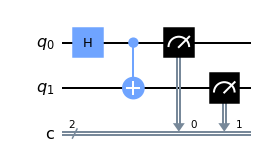

In [22]:
display(circuit.draw('mpl'))

## Step 5 : Simulate the Experiment

In [23]:
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator) 
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 474, '00': 526}


## Step 6 : Visualize the Results

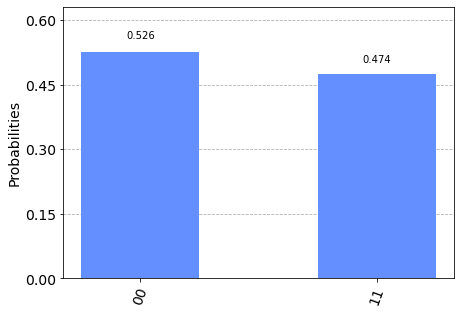

In [24]:
plot_histogram(counts)

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
